Linear Regression

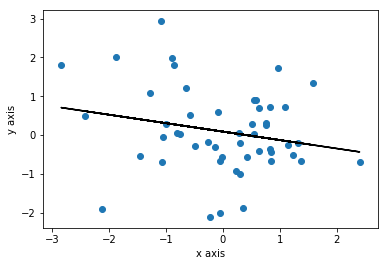

-0.998539048269


In [1]:
#import the numpy library
import numpy as np

#import the library for plotting
import matplotlib.pyplot as plt

#Data set of 50 random points
n=50
x=np.random.randn(n)
y=np.random.randn(n)

#Plot 50 points
fig,ax=plt.subplots()

#Plot best fitting line 
fit = np.polyfit(x,y,1)

#Plot the straight best fitting line y=slope*x+intercept
ax.plot(x, fit[0]*x+fit[1],color='black')

ax.scatter(x,y)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()

x_input=5
predicted_value=fit[0]*x_input+fit[1]
print(predicted_value)

In [8]:
#import the scikit-learn library
from sklearn import tree #This imports the tree classifier from the 
#scikit-learn library

#Set of inputs
inputs_characteristics=[[1,1],[8,0],[5,1],[2,1],[6,0],[9,1],[3,1],[4,1],[7,0]]

#classes these inputs belong to
class_labels=[0,0,0,1,1,1,2,2,2]

#create tree classifier
clf=tree.DecisionTreeClassifier();

#train the classifier
#fit function is find patterns in data
clf=clf.fit(inputs_characteristics,class_labels)

print("The class to which the new input belongs is:")
print(clf.predict([[10,10]]))


The class to which the new input belongs is:
[1]


### Support Vector Machines

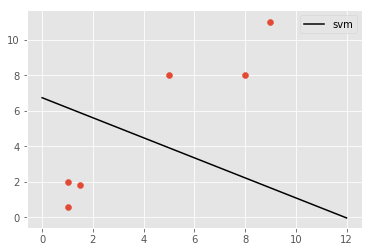

The class of the new input is:
[0]


/apps/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [14]:
#import basic libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

#emulate the aesthetics of ggplot in R
style.use("ggplot")

from sklearn import svm

#input data
X=[1,5,1.5,8,1,9]
Y=[2,8,1.8,8,0.6,11]

labels=[0,1,0,1,0,1]

clf=svm.SVC(kernel='linear',C=1.0)

input_data=[[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]]

clf.fit(input_data,labels)

#returns the coefficients of the hyperplane (SVM)
w=clf.coef_[0]

#using the coefficients find the slope or direction of the hyperplane
a=-w[0]/w[1]

#find points for hyperplane
#linspace
xx=np.linspace(0,12)
#equation for hyperplane
yy=a*xx-clf.intercept_[0]/w[1]

#plot the hyperplane
hyperplane=plt.plot(xx,yy,'k-',label="svm")
plt.scatter(X,Y)
plt.legend()
plt.show()

print("The class of the new input is:")
print(clf.predict([0.58,0.76]))

### K-Nearest Neighbour

result:  [[ 0.]] 

neighbours: [[ 1.  0.  0.]] 

distance: [[  29.   32.  122.]]


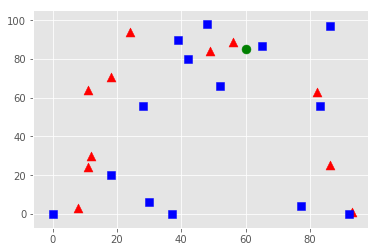

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

trainData=np.random.randint(0,100,(25,2)).astype(np.float32)
responses=np.random.randint(0,2,(25,1)).astype(np.float32)

red=trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

blue=trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

#get in new comer and plot it
newcomer=np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

#Create the K-nearest neighbour classifer
knn=cv2.ml.KNearest_create();
#train the classifier
#passing 0 as a parameter considers the length of array as 1 for entire row.
knn.train(trainData,0,responses)
ret,results,neighbours,dist=knn.findNearest(newcomer,3)
print("result: ",results,"\n")
print("neighbours:",neighbours,"\n")
print("distance:",dist)
plt.show()


### NEURAL NETWORK

In [26]:
import numpy as np

#define prediction function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define inputs
x=np.array([[0.45,0,0.21],[0.5,0.32,0.21],[0.6,0.5,0.19],[0.7,0.9,0.19]])

#output
y=np.array([[0.5,0.4,0.6,0.9]]).T

#good practice
np.random.seed(1)

#Define weights
weights=2*np.random.random((3,1))-1

for iter in range(1000):
    #get inputs
    input_var=x
    #output
    dot_prod=np.dot(input_var,weights)
    
    #predict output
    output=sigmoid(dot_prod)

    #find how much we missed by from actual output
    error=y-output;
    
    #adjust weights accordingly
    weights+=np.dot(input_var.T,error)

#print the weights best suited for our prediction model
print("The weights that the neural network found was:")
print(weights)

new_input=np.array([0.3,0.9,0.1])
new_input_dot_product=np.dot(new_input,weights)
predicted_output=sigmoid(new_input_dot_product)
print("The new predicted output is:")
print(predicted_output)
    

The weights that the neural network found was:
[[ 0.77051871]
 [ 1.85826276]
 [-3.820081  ]]
The new predicted output is:
[ 0.82077161]
